In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.models import save_model, load_model

def load_imgs(path, folders):
    imgs = []
    labels = []
    n_imgs = 0
    for c in folders:
        # iterate over all the files in the folder
        for f in os.listdir(os.path.join(path, c)):
            if not f.endswith('.jpg'):
                continue
            # load the image (here you might want to resize the img to save memory)
            im = Image.open(os.path.join(path, c, f)).copy()
            imgs.append(im)
            labels.append(c)
        print('Loaded {} images of class {}'.format(len(imgs) - n_imgs, c))
        n_imgs = len(imgs)
    print('Loaded {} images total.'.format(n_imgs))
    return imgs, labels

def plot_sample(imgs, labels, nrows=4, ncols=4, resize=None):
    # create a grid of images
    fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    # take a random sample of images
    indices = np.random.choice(len(imgs), size=nrows*ncols, replace=False)
    for ax, idx in zip(axs.reshape(-1), indices):
        ax.axis('off')
        # sample an image
        ax.set_title(labels[idx])
        im = imgs[idx]
        if isinstance(im, np.ndarray):
            im = Image.fromarray(im)
        if resize is not None:
            im = im.resize(resize)
        ax.imshow(im, cmap='gray')


# map class -> idx
label_to_idx = {
    'CHEETAH':0,
    'OCELOT': 1,
    'SNOW LEOPARD':2,
    'CARACAL':3,
    'LIONS': 4,
    'PUMA': 5,
    'TIGER':6
}

idx_to_label = {
    0:'CHEETAH',
    1:'OCELOT',
    2:'SNOW LEOPARD',
    3:'CARACAL',
    4:'LIONS',
    5:'PUMA',
    6:'TIGER'
}

def make_dataset(imgs, labels, label_map, img_size):
    x = []
    y = []
    n_classes = len(list(label_map.keys()))
    for im, l in zip(imgs, labels):
        # preprocess img
        x_i = im.resize(img_size)
        x_i = np.asarray(x_i)

        # encode label
        y_i = np.zeros(n_classes)
        y_i[label_map[l]] = 1.

        x.append(x_i)
        y.append(y_i)
    return np.array(x).astype('float32'), np.array(y)




def save_keras_model(model, filename):
    """
    Saves a Keras model to disk.
    Example of usage:

    >>> model = Sequential()
    >>> model.add(Dense(...))
    >>> model.compile(...)
    >>> model.fit(...)
    >>> save_keras_model(model, 'my_model.h5')

    :param model: the model to save;
    :param filename: string, path to the file in which to store the model.
    :return: the model.
    """
    save_model(model, filename)


def load_keras_model(filename):
    """
    Loads a compiled Keras model saved with models.save_model.

    :param filename: string, path to the file storing the model.
    :return: the model.
    """
    model = load_model(filename)
    return model

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Loaded 240 images of class CHEETAH
Loaded 238 images of class OCELOT
Loaded 236 images of class SNOW LEOPARD
Loaded 190 images of class CARACAL
Loaded 233 images of class LIONS
Loaded 241 images of class PUMA
Loaded 242 images of class TIGER
Loaded 1620 images total.
x shape: (1620, 224, 224, 3), y shape:(1620, 7)


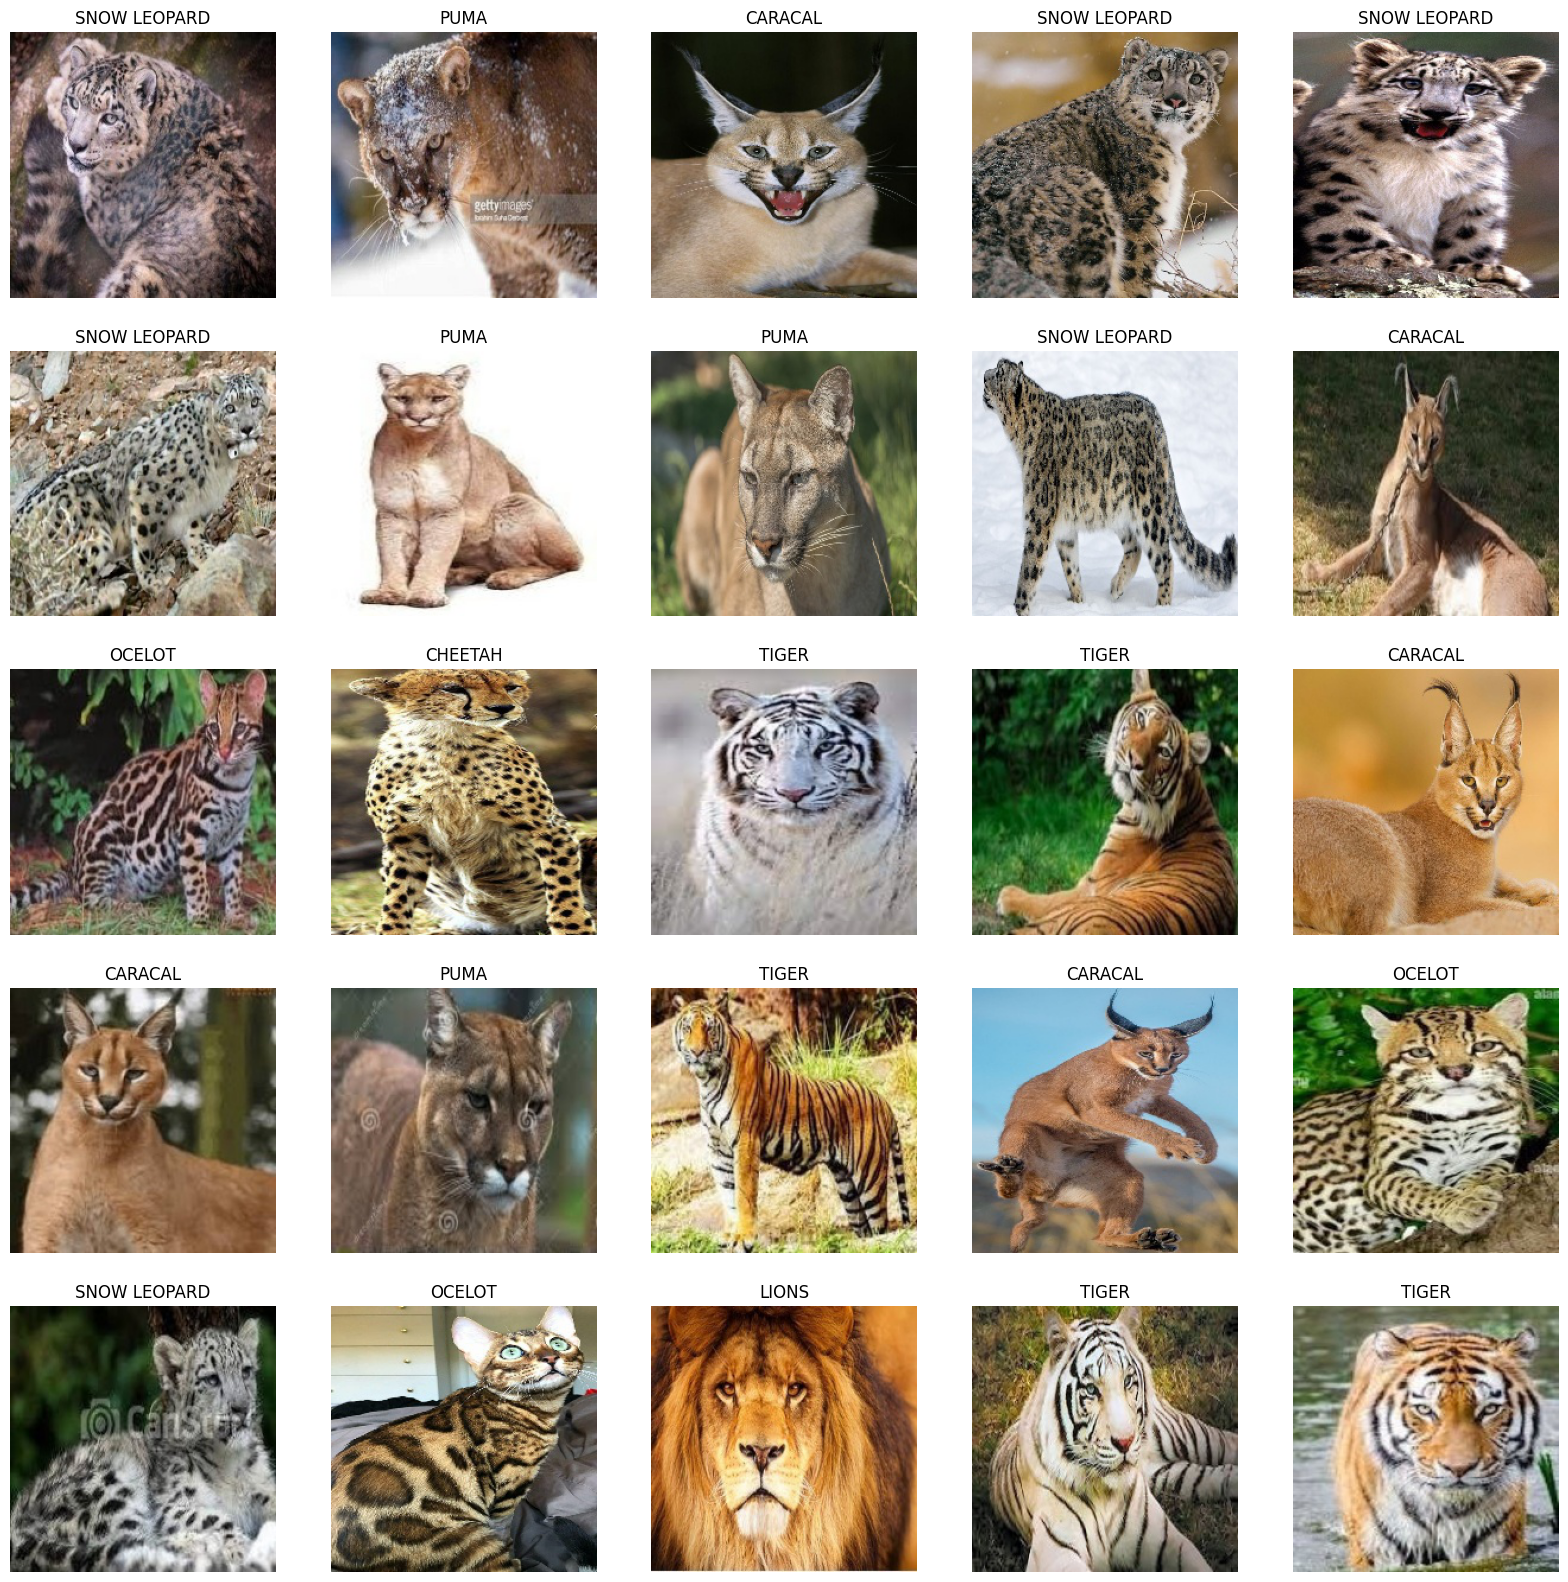

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")


imgs, labels = load_imgs('/content/drive/MyDrive/Dataset', ['CHEETAH' ,'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER'])
x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
print('x shape: {}, y shape:{}'.format(x.shape, y.shape))
plot_sample(imgs, labels, 5, 5, resize=(224, 224))


Training, validation, test samples: 911, 405
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               19267712  
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 7)                 903       
                                                                 
Total params: 19,285,127
Trainable params: 19,285,127
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 1s 37ms/step - loss: 0.4482 - acc: 0.1438 - val_loss: 65.4209 - val_acc: 0.1612
Epoch 2/100
29/29 [==============================] - 1s 20ms/step - loss: 0.4171 - acc: 0.1745 - val_loss: 62.9454 - val_acc: 0.

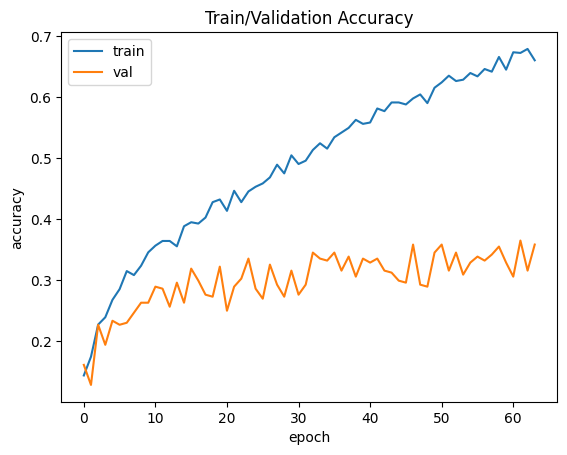

In [ ]:
################### Task 1 ###################
# Solution go here
#Flatten the images into 1D vectors by using tf.reshape
x = x.reshape(x.shape[0], -1)
#The data are split into training and testing sets
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)
# Normalize to 0-1 range
x_train = x_train / 255
x_test = x_test / 255
print('Training, validation, test samples: {}, {}'.format(len(x_train), len(x_test)))
#Build a Feed Forward Neural Network of three Dense layers
from tensorflow import keras
from keras import Sequential, optimizers
from keras.layers import Dense
from tensorflow import keras
from keras.callbacks import EarlyStopping
def create_model():
  temp = Sequential()
  #Dense layers have 128 units each and use the ReLU activation function
  temp.add(Dense(128, activation='relu', input_shape=(x.shape[1:])))
  temp.add(Dense(128, activation='relu'))
  #The last one uses the sigmoid activation function and has 7 units
  temp.add(Dense(7, activation='sigmoid'))
  #Compile the model with the SGD optimizer with a learning rate of 0.001
  temp.compile(optimizers.SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])
  return temp


model=create_model()
model.summary()

#EarlyStopping is used to monitor the validation loss and stop training if it does not improve for 10 consecutive epochs
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose= 1)
history = model.fit(x_train, y_train, epochs=100,callbacks = [es], validation_data=(x_val, y_val))
#The model is evaluated to the test set and then we print the test loss and accuracy
from keras.models import save_model,load_model
save_model(model, 'T1_model.h5')
loaded_model = load_model('T1_model.h5')
eval_results = loaded_model.evaluate(x_test, y_test)
print('Test loss: {} - Test acc: {}'.format(*eval_results))
#plot with epochs on the x-axis,accurancy in y-axis showing the train accuracy and the validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train/Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
################### Task 2 ###################

def create_model2():
  model = Sequential()
  #3 Convolutional layers with 16 layers,activation function ReLu and a filter size of 3x3
  #3 Max pooling layer with a pool size of 2x2  after each convolutional layer
  model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(4, 4)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  #3 Dense layers with 128 units each and using the ReLU activation function
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  #The last one uses the softmax activation function and has 7 units
  model.add(Dense(7, activation='softmax'))
  #Compile the model with the Adam optimizer with a learning rate of 0.001
  model.compile(optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])
  return model
#Load Data
imgs, labels = load_imgs('/content/drive/MyDrive/Dataset', ['CHEETAH' ,'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER'])
x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
import numpy as np
from sklearn.model_selection import train_test_split
from keras import utils
train_idx, non_train_idx = train_test_split(np.arange(x.shape[0]), train_size=0.7, shuffle=True)
val_idx, test_idx = train_test_split(non_train_idx, test_size=0.5, shuffle=True)
# Normalize to 0-1 range
x_train, y_train = x[train_idx]/255., y[train_idx]
x_val, y_val = x[val_idx]/255., y[val_idx]
x_test, y_test = x[test_idx]/255., y[test_idx]
#Build a Convolutional neural network
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout,Dense
from keras import Sequential, optimizers
model=create_model2()
model.summary()
from keras.callbacks import EarlyStopping
#EarlyStopping is used to monitor the validation loss and stop training if it does not improve for 50 consecutive epochs
es = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model.fit(x_train, y_train, epochs=100, validation_split=0.1, callbacks=[es])
#The model is evaluated to the test set and then we print the test loss and accuracy
from keras.models import save_model,load_model
save_model(model, 'T2_model.h5')
loaded_model = load_model('T2_model.h5')
scores = loaded_model.evaluate(x_test, y_test)
print('Test loss: {:.4f} - Accuracy: {:.3f}'.format(*scores))
#We compare the T2 with T1 model
stat=scores[1]/eval_results[1]
print('T2 performs {:.3f} times better than T1'.format(stat))







Loaded 240 images of class CHEETAH
Loaded 238 images of class OCELOT
Loaded 236 images of class SNOW LEOPARD
Loaded 190 images of class CARACAL
Loaded 233 images of class LIONS
Loaded 241 images of class PUMA
Loaded 242 images of class TIGER
Loaded 1620 images total.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 27, 27, 16)       0         
 g2D)                                             

In [ ]:
################### Task 2.6 ###################
# Solution go here
def create_model3():
  modelI = Sequential()
  #3 Convolutional layers with 16 layers,activation function ReLu and a filter size of 3x3
  #3 Max pooling layer with a pool size of 2x2  after each convolutional layer
  modelI.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
  modelI.add(MaxPooling2D(pool_size=(2, 2)))
  modelI.add(Conv2D(16, (3, 3), activation='relu'))
  modelI.add(MaxPooling2D(pool_size=(4, 4)))
  modelI.add(Conv2D(32, (3, 3), activation='relu'))
  modelI.add(MaxPooling2D(pool_size=(2, 2)))
  #Flatten for reshape the output of the convolutional layers into a 1D vector.
  modelI.add(Flatten())
  #3 Dense layers with 128 units each and using the ReLU activation function
  modelI.add(Dense(128, activation='relu'))
  modelI.add(Dense(128, activation='relu'))
  #The last one uses the softmax activation function and has 7 units
  modelI.add(Dense(7, activation='softmax'))
  #Compile the model with the Adam optimizer with a learning rate of 0.001
  modelI.compile(optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])
  return modelI
#Load Data
imgs, labels = load_imgs('/content/drive/MyDrive/Dataset', ['CHEETAH' ,'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER'])
x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
import numpy as np
from sklearn.model_selection import train_test_split
from keras import utils
train_idx, non_train_idx = train_test_split(np.arange(x.shape[0]), train_size=0.7, shuffle=True)
val_idx, test_idx = train_test_split(non_train_idx, test_size=0.5, shuffle=True)
# Normalize to 0-1 range
x_train, y_train = x[train_idx]/255., y[train_idx]
x_val, y_val = x[val_idx]/255., y[val_idx]
x_test, y_test = x[test_idx]/255., y[test_idx]
#Image augmentation
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(channel_shift_range=0.3,   # random channel shifts
                               rotation_range=30,         # rotation
                               zoom_range=0.3,            # zoom in/out randomly
                               shear_range=15,            # deformation
                              )
augmented_data = train_gen.flow(x_train, y_train, batch_size=32)
val_gen = ImageDataGenerator()
#Build a Convolutional neural network
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout,Dense
from keras import Sequential, optimizers
model=create_model3()
model.summary()
from keras.callbacks import EarlyStopping
#EarlyStopping is used to monitor the validation loss and stop training if it does not improve for 50 consecutive epochs
es = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
train_loader = train_gen.flow(x_train, y_train, batch_size=32)
val_loader = val_gen.flow(x_val, y_val, batch_size=x_val.shape[0])
model.fit(augmented_data, epochs=100, validation_data=val_loader, callbacks=[es])
#The model is evaluated to the test set and then we print the test loss and accuracy
from keras.models import save_model,load_model
save_model(model, 'T2_model_Image.h5')
loaded_model = load_model('T2_model_Image.h5')
scores2 = loaded_model.evaluate(x_test, y_test)
print('Test loss: {:.4f} - Accuracy: {:.3f}'.format(*scores2))

Loaded 240 images of class CHEETAH
Loaded 238 images of class OCELOT
Loaded 236 images of class SNOW LEOPARD
Loaded 190 images of class CARACAL
Loaded 233 images of class LIONS
Loaded 241 images of class PUMA
Loaded 242 images of class TIGER
Loaded 1620 images total.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 16)       0         
 2D)                                                